# 回帰分析をスクラッチで実装

## データセット用意

In [1]:
from numpy.random import *

def dataset(n=50, s=42):
    seed(s)
    x = 10 * rand(n)
    noise = 0.8 * randn(n)
    y = x + np.sin(noise)
    return x, y

n = 50
x, y = dataset(n, 42)

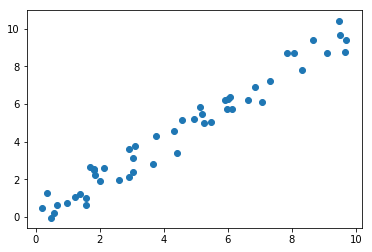

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

## sklearnで回帰分析

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
x = x.reshape(-1, 1)
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
a = lr.intercept_
a

0.03739699521344697

In [6]:
b = lr.coef_[0]
b

0.9968466069321306

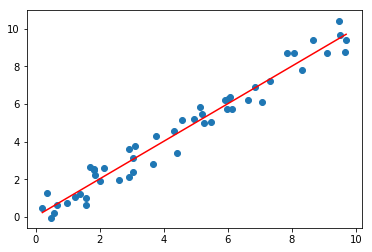

In [7]:
sx = np.array([np.min(x), np.max(x)])
sy = sx * b + a
plt.scatter(x, y)
plt.plot(sx, sy, 'red')

## statsmodelsで回帰分析

In [8]:
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(x))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1228.
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           7.48e-36
Time:                        02:11:58   Log-Likelihood:                -42.272
No. Observations:                  50   AIC:                             88.54
Df Residuals:                      48   BIC:                             92.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0374      0.151      0.248      0.8

In [9]:
result.bse

array([0.15067761, 0.02844328])

## 回帰係数を求める

In [10]:
X = sm.add_constant(x)

In [11]:
w = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y
a = w[0]
b = w[1]
a, b

(0.03739699521345166, 0.9968466069321293)

## 標準誤差

### 残差二乗和

In [12]:
s_2 = ((y - (a + b * x).reshape(50))**2).sum() / (50-2)
s_2

0.330826307725182

In [13]:
k = X.shape[1]
u_hat = y - X @ w
s_2 = (u_hat.T @ u_hat) / (n-k)
s_2

0.330826307725182

### 標準誤差

In [14]:
se = np.sqrt(s_2 * np.linalg.inv(X.T @ X))
se

C:\Users\ryota\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[0.15067761,        nan],
       [       nan, 0.02844328]])

In [20]:
np.linalg.inv(X.T @ X)

array([[ 0.06862738, -0.01090486],
       [-0.01090486,  0.00244545]])

## t値

In [15]:
w[0] / se[0, 0]

0.24819211887568307

In [16]:
w[1] / se[1, 1]

35.04682206823721

### p値

In [37]:
from scipy.stats import t
rv = t(n-k)
rv

In [55]:
(1 - rv.cdf(0.24819211887568307)) * 2

0.8050445246810647

In [1]:
from bs4 import BeautifulSoup
import requests

def get_soup(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'html.parser')
    return soup

In [3]:
from bs4 import BeautifulSoup
import requests


def get_from_jlyric(url):
    soup = get_soup(url)
    # url = 'http://j-lyric.net/artist/a05ab37/l04c7fc.html'
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')

    lyric_raw_text = soup.find(id='Lyric')
    a = str(lyric_raw_text).replace('<br/>','\n').replace('<p id="Lyric">', '').replace('</p>', '')

    # print(lyric_raw_text)
    print(a)

In [4]:
get_from_jlyric('http://j-lyric.net/artist/a05ab37/l0434c2.html')

どこまで来たんだろう
これからどこまで行けばいいんだろう
迷う時もある

錆びれた街灯に浮かんだ
猫背の僕を見たら君は笑うよな

「昨日と違う僕をどこかで見て欲しい」
夜空を見上げた

この旅の答えはきっと
「君だ。」って
「君だ。」って
そんな気がするから
確かな地図が
なくたって
駆け出して
時には躓いても…

解けた靴紐を
また、固く結んだ

形ない夢だけが
少しずつ崩れそうで恐くなる
人いきれの街

でも、果てしなく続くように思える
この道の先に、ほら、君がいるから

目が眩むような焦燥感も力に
変えていけるんだろう

例えどんなことが起きようと
僕だって
僕だって
やれると思うんだ
描いた地図が
欠けたって
褪せたって
描き直せばいいさ
昨日までの僕と　ここでもうサヨナラ

どうしても
どうしても
伝えたいことがある
呼吸を整えて
何度も、何度でも言うよ

この未来(とわ)の旅の答えはいつも
君なんだ
君なんだ
どこかで見ていてね
確かな地図が
なくたって
駆け出して
まだ見ぬ世界へ…

結んだ靴紐が
君との約束



In [50]:
import re

def get_from_utanet(url):
    soup = get_soup(url)
    raw_text = soup.find('div', id='kashi_area')
    return str(raw_text).replace('\u3000', '　').replace('<br/>', '\n')

print(get_from_utanet('https://www.uta-net.com/song/112293/'))

<div id="kashi_area" itemprop="text">前を向きなよ　振り返ってちゃ　上手く歩けない<br>遠ざかる君に　手を振るのがやっとで<br>
声に出したら　引き止めそうさ　心で呟く
“僕は僕の夢へと　君は君の夢を”

あたりまえの温もり　失くして　初めて気づく
寂しさ　噛み締めて　歩みだす勇気　抱(いだ)いて

溢れだす涙が　君を遮(さえぎ)るまえに
せめて笑顔で“またいつか”
傷つけ合っては　何度も許し合えたこと
代わりなき僕らの証になるだろう

“我侭だ”って貶(けな)されたって　願い続けてよ
その声は届くから　君が君でいれば

僕がもしも　夢に　敗れて　諦めたなら
遠くで叱ってよ　あの時のようにね

君の指差すその未来(さき)に　希望があるはずさ
誰にも決められはしないよ
一人で抱え込んで　生きる意味を問うときは
そっと思い出して　あの日の僕らを

“またね”って言葉の儚さ　叶わない約束
いくつ交わしても慣れない
なのに追憶の破片(かけら)を　敷き詰めたノートに
君の居ないページは無い

溢れだす涙　拭う頃　君はもう見えない
想う言葉は“ありがとう”
傷つけ合っては　何度も笑い合えたこと
絆を胸に秘め　僕も歩き出す</br></br></div>


In [5]:
url = 'https://www.utamap.com/showkasi.php?surl=k-121018-001'
soup = get_soup(url)
soup.find('td', class_='noprint kasi_honbun')

<td class="noprint kasi_honbun" style="padding-left:30px;">
君はまだ 信じているかい?<br/>失った 遠き夢の影<br/>俯いて 疲れていないかい?<br/>声もなく 理解もない日々<br/><br/>"君のために生きていたい"と<br/>心はまだ疼いてる<br/><br/>挫けるんじゃないと 煽る夜明け<br/>君のその胸に 秘めた祈りを<br/>暖めたいんだ 消えぬように<br/>この身は削れたっていい<br/>答えがあるなら それが愛なら<br/><br/>何(なん)のため ここにいるのか?<br/>誰のため 傷ついてくのか?<br/>輝きを 貰えた記憶<br/>引きずったまま 積もってく抜け殻<br/><br/>明日のために 泣きたいのなら<br/>涙は そのためにある<br/><br/>あと一息だけ 胸を焦がして<br/>悲しみのすべて 受け止めるから<br/>描いた色は 消え去っても<br/>答えを書けばいいさ<br/>終わりは無いんだと それが愛だと<br/><br/>冷えた指先も 涙の熱も<br/>生き抜いた軌跡(しるし)<br/>汚れ(けがれ)もない･･･<br/><br/>傷ついた羽根を癒す夜明け<br/>微かでも残る あの日の息吹<br/>君の手を取って 掻き集め<br/>答えに変えるだけさ<br/>終わりは無いんだと それが愛だと

<!-- 歌詞 end -->
</td>